In [26]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "neuronal-sequence-test"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

# User libraries
from mesostat.utils.arrays import numpy_add_empty_axes
from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from mesostat.metric.metric import MetricCalculator
from mesostat.metric.metric_non_uniform import MetricCalculatorNonUniform

from src.lib.data_db import BehaviouralNeuronalDatabase
from src.lib.metric_wrapper import metric_by_interval, metric_by_phase
from src.lib.extra_metrics import num_non_zero_std, num_sample

%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/neuronal-sequence-test
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
#params['root_path_data']  = gui_fpath("Path to data files", "./")
params['root_path_dff'] = '/media/alyosha/Data/TE_data/mariadata/dff/'
params['root_path_deconv'] = '/media/alyosha/Data/TE_data/mariadata/deconv/'

In [3]:
dataDB = BehaviouralNeuronalDatabase(params)

In [4]:
dataDB.read_neuro_files()

IntProgress(value=0, description='Read DFF Data:', max=27)

IntProgress(value=0, description='Read DECONV Data:', max=27)

In [5]:
dataDB.read_behavior_files()

IntProgress(value=0, description='Read Neuro Data:', max=27)

No trials found for Trial_LWhole_Mistake skipping
No trials found for Trial_RWhole_Mistake skipping
No trials found for Trial_LWhole_Mistake skipping


# 1. SNR

**Goal**: Attempt to predict L/R and C/M from mean activity over trial

doing mouse m060
doing mouse m061
doing mouse m065
doing mouse m066
doing mouse m067
doing mouse m068


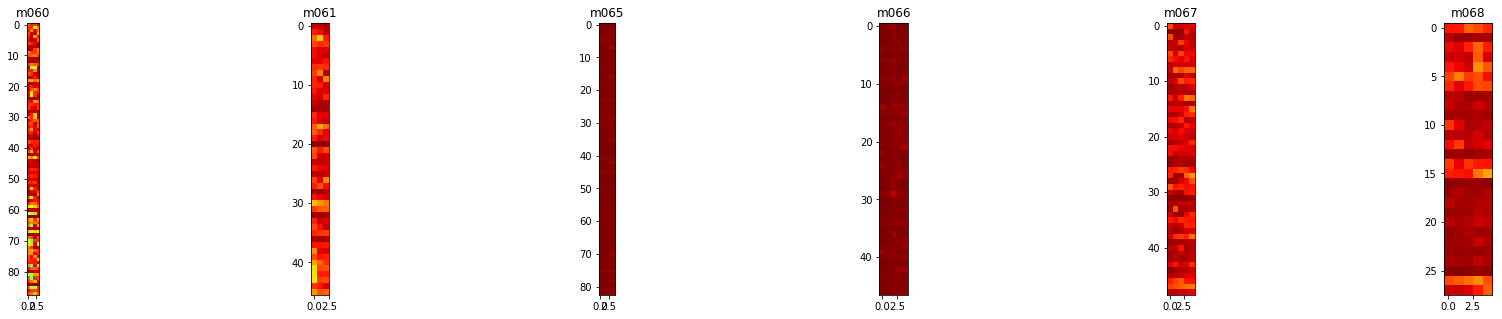

In [29]:
mc = MetricCalculator(serial=True, verbose=False)

fig, ax = plt.subplots(ncols=len(dataDB.mice), figsize=(5 * len(dataDB.mice),5))
for iMouse, mousename in enumerate(sorted(dataDB.mice)):
    print('doing mouse', mousename)
    rows = dataDB.get_rows('dff', {'mousename' : mousename})

    rez = []
    for idx, row in rows.iterrows():
        mc.set_data(dataDB.dataNeuronal['raw'][idx], 'sp')
        rez += [mc.metric3D('autocorr_d1', 'p', metricSettings=None, sweepSettings=None)]
        
    ax[iMouse].set_title(mousename)
    ax[iMouse].imshow(np.array(rez).T, cmap='jet', vmin=0, vmax=1)
plt.show()